In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
yield_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\yield.csv")
temp_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\temp.csv")
rainfall_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\rainfall.csv")
pesticides_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\pesticides.csv")
yield_df = pd.read_csv("C:\\Users\\nossa\\Downloads\\PYTHON-E3\\PYTHON-E3\\yield_df.csv")

In [3]:
yield_data.head(7)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
5,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1966,1966,hg/ha,14400
6,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1967,1967,hg/ha,14144


In [4]:
needed = ['Area','Item','Year','Value']
yield_data = yield_data[needed]

In [5]:
temp_data.head(7)

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN


In [6]:
temp_data.rename(columns = {'year':'Year','country':'Area'}, inplace = True)
temp_data.head(7)

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN


In [7]:
rainfall_data.head(7)

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
5,Afghanistan,1991,327
6,Afghanistan,1992,327


In [8]:
pesticides_data.head(7)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
5,Pesticides Use,Albania,Use,Pesticides (total),1995,tonnes of active ingredients,251.00
6,Pesticides Use,Albania,Use,Pesticides (total),1996,tonnes of active ingredients,313.96


In [9]:
needed = ['Area','Year','Value']
pesticides_data = pesticides_data[needed]

In [10]:
print("pesticides -- > ",pesticides_data.shape)
print("rainfall -- > ",rainfall_data.shape)
print("temp -- > ",temp_data.shape)
print("yield -- > ",yield_data.shape)

pesticides -- >  (4349, 3)
rainfall -- >  (6727, 3)
temp -- >  (71311, 3)
yield -- >  (56717, 4)


In [11]:
temp_data= temp_data[temp_data.Year >= 1961]
yield_final = pd.merge(yield_data,temp_data,on=['Year','Area'])
yield_final = pd.merge(yield_final,pesticides_data,on=['Year','Area'])
yield_final.rename(columns = {'Value_x':'Yield_Value','Value_y':'Pesticides_Value'}, inplace = True)
rainfall_data.rename(columns = {' Area':'Area'}, inplace = True)
yield_final = pd.merge(yield_final,rainfall_data,on=['Year','Area'])
yield_final.rename(columns = {'average_rain_fall_mm_per_year':'average_rain'}, inplace = True)

In [12]:
yield_final["average_rain"] = pd.to_numeric(yield_final["average_rain"], errors='coerce')

In [13]:
print (yield_final.shape)

(28248, 7)


In [14]:
yield_final.head(7)

,Area,Item,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain
0,Albania,Maize,1990,36613,16.37,121.0,1485.0
1,Albania,Potatoes,1990,66667,16.37,121.0,1485.0
2,Albania,"Rice, paddy",1990,23333,16.37,121.0,1485.0
3,Albania,Sorghum,1990,12500,16.37,121.0,1485.0
4,Albania,Soybeans,1990,7000,16.37,121.0,1485.0
5,Albania,Wheat,1990,30197,16.37,121.0,1485.0
6,Albania,Maize,1991,29068,15.36,121.0,1485.0


In [15]:
import pandas as pd

nan_values = yield_final[yield_final.isna().any(axis=1)]


numeric_columns = yield_final.select_dtypes(include=['number']).columns
other_values = yield_final[(yield_final[numeric_columns] > 100).any(axis=1)]

print("NaN values:")
print(nan_values)

print("\nOther values (greater than 100):")
print(other_values)


NaN values:
         Area            Item  Year  Yield_Value  avg_temp  Pesticides_Value   
1986  Bahamas         Cassava  1990       106667     25.74            484.59  \
1987  Bahamas           Maize  1990        15000     25.74            484.59   
1988  Bahamas  Sweet potatoes  1990        38118     25.74            484.59   
1989  Bahamas         Cassava  1991       100000     25.66            484.59   
1990  Bahamas           Maize  1991        16667     25.66            484.59   
1991  Bahamas  Sweet potatoes  1991        31385     25.66            484.59   

      average_rain  
1986           NaN  
1987           NaN  
1988           NaN  
1989           NaN  
1990           NaN  
1991           NaN  

Other values (greater than 100):
           Area            Item  Year  Yield_Value  avg_temp   
0       Albania           Maize  1990        36613     16.37  \
1       Albania        Potatoes  1990        66667     16.37   
2       Albania     Rice, paddy  1990        23333    

In [16]:
import pandas as pd
import numpy as np

yield_final_numeric = pd.get_dummies(yield_final)

for column in yield_final_numeric.select_dtypes(include=[np.number]).columns:
    mean = yield_final_numeric[column].mean()
    std = yield_final_numeric[column].std()
    nan_count = yield_final_numeric[column].isna().sum()
    if nan_count > 0:
        fill_values = np.random.normal(loc=mean, scale=std, size=nan_count)
        yield_final_numeric[column][np.isnan(yield_final_numeric[column])] = fill_values

if yield_final_numeric.isna().sum().sum() == 0:
    print("All NaN values have been handled successfully.")
else:
    print("There are still NaN values remaining in the dataset.")


All NaN values have been handled successfully.


C:\Users\nossa\AppData\Local\Temp\ipykernel_11980\3485125272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yield_final_numeric[column][np.isnan(yield_final_numeric[column])] = fill_values


In [17]:
yield_final_numeric

,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,16.37,121.00,1485.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,66667,16.37,121.00,1485.0,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,23333,16.37,121.00,1485.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,12500,16.37,121.00,1485.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,7000,16.37,121.00,1485.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28243,2013,22581,19.76,2550.07,657.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
28244,2013,3066,19.76,2550.07,657.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28245,2013,13142,19.76,2550.07,657.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
28246,2013,22222,19.76,2550.07,657.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [18]:
import pandas as pd

nan_values_numeric = yield_final_numeric[yield_final_numeric.isna().any(axis=1)]

numeric_columns = yield_final_numeric.select_dtypes(include=['number']).columns
other_values_numeric = yield_final_numeric[(yield_final_numeric[numeric_columns] > 100).any(axis=1)]

print("NaN values:")
print(nan_values_numeric)

print("\nOther values (greater than 100):")
print(other_values_numeric)


NaN values:
Empty DataFrame
Columns: [Year, Yield_Value, avg_temp, Pesticides_Value, average_rain, Area_Albania, Area_Algeria, Area_Angola, Area_Argentina, Area_Armenia, Area_Australia, Area_Austria, Area_Azerbaijan, Area_Bahamas, Area_Bahrain, Area_Bangladesh, Area_Belarus, Area_Belgium, Area_Botswana, Area_Brazil, Area_Bulgaria, Area_Burkina Faso, Area_Burundi, Area_Cameroon, Area_Canada, Area_Central African Republic, Area_Chile, Area_Colombia, Area_Croatia, Area_Denmark, Area_Dominican Republic, Area_Ecuador, Area_Egypt, Area_El Salvador, Area_Eritrea, Area_Estonia, Area_Finland, Area_France, Area_Germany, Area_Ghana, Area_Greece, Area_Guatemala, Area_Guinea, Area_Guyana, Area_Haiti, Area_Honduras, Area_Hungary, Area_India, Area_Indonesia, Area_Iraq, Area_Ireland, Area_Italy, Area_Jamaica, Area_Japan, Area_Kazakhstan, Area_Kenya, Area_Latvia, Area_Lebanon, Area_Lesotho, Area_Libya, Area_Lithuania, Area_Madagascar, Area_Malawi, Area_Malaysia, Area_Mali, Area_Mauritania, Area_Mauriti

In [19]:
from scipy import stats

numerical_columns = yield_final_numeric.select_dtypes(include=['number']).columns
z_scores = stats.zscore(yield_final_numeric[numerical_columns])

threshold = 3

outliers_indices = (np.abs(z_scores) > threshold).any(axis=1)

yield_final_no_outliers = yield_final_numeric[~outliers_indices]

print(yield_final_no_outliers)


       Year  Yield_Value  avg_temp  Pesticides_Value  average_rain   
0      1990        36613     16.37            121.00        1485.0  \
1      1990        66667     16.37            121.00        1485.0   
2      1990        23333     16.37            121.00        1485.0   
3      1990        12500     16.37            121.00        1485.0   
4      1990         7000     16.37            121.00        1485.0   
...     ...          ...       ...               ...           ...   
28243  2013        22581     19.76           2550.07         657.0   
28244  2013         3066     19.76           2550.07         657.0   
28245  2013        13142     19.76           2550.07         657.0   
28246  2013        22222     19.76           2550.07         657.0   
28247  2013        22888     19.76           2550.07         657.0   

       Area_Albania  Area_Algeria  Area_Angola  Area_Argentina  Area_Armenia   
0              True         False        False           False         False  \

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_columns = yield_final_no_outliers.select_dtypes(include=['number']).columns

yield_final_normalized = yield_final_no_outliers.copy()
yield_final_normalized[numerical_columns] = scaler.fit_transform(yield_final_normalized[numerical_columns])

print(yield_final_normalized)


       Year  Yield_Value  avg_temp  Pesticides_Value  average_rain   
0       0.0     0.110195  0.508264          0.000563      0.449671  \
1       0.0     0.200773  0.508264          0.000563      0.449671   
2       0.0     0.070171  0.508264          0.000563      0.449671   
3       0.0     0.037522  0.508264          0.000563      0.449671   
4       0.0     0.020946  0.508264          0.000563      0.449671   
...     ...          ...       ...               ...           ...   
28243   1.0     0.067905  0.625000          0.011876      0.190028   
28244   1.0     0.009090  0.625000          0.011876      0.190028   
28245   1.0     0.039457  0.625000          0.011876      0.190028   
28246   1.0     0.066823  0.625000          0.011876      0.190028   
28247   1.0     0.068830  0.625000          0.011876      0.190028   

       Area_Albania  Area_Algeria  Area_Angola  Area_Argentina  Area_Armenia   
0              True         False        False           False         False  \

**A1**

In [21]:
import numpy as np

# As the data frame contains multiple classes we take are considering the classes yield_Value and avg_temp 
class1 = yield_final_normalized['Yield_Value']
class2 = yield_final_normalized['avg_temp']

# Caluclating the Centriod for each class by using the inbuilt function mean(class, axis=0) from numpy
centroid1 = np.mean(class1, axis=0)
centroid2 = np.mean(class2, axis=0)

# Calculating the Standard deviation for each class by using inbuilt function std() from numpy
spread1 = np.std(class1)
spread2 = np.std(class2)

# Calculate the distance between the mean vectors of the two classes
interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("\nIntraclass Spread (Standard Deviation):")
print("\nClass 'Yield_Value':", spread1)
print("\nClass 'avg_temp':", spread2)
print("\nInterclass Distance between 'Yield_Value' and 'avg_temp':", interclass_distance)



Intraclass Spread (Standard Deviation):

Class 'Yield_Value': 0.21843466540089126

Class 'avg_temp': 0.217267277763489

Interclass Distance between 'Yield_Value' and 'avg_temp': 0.4428830293056998


**A2**

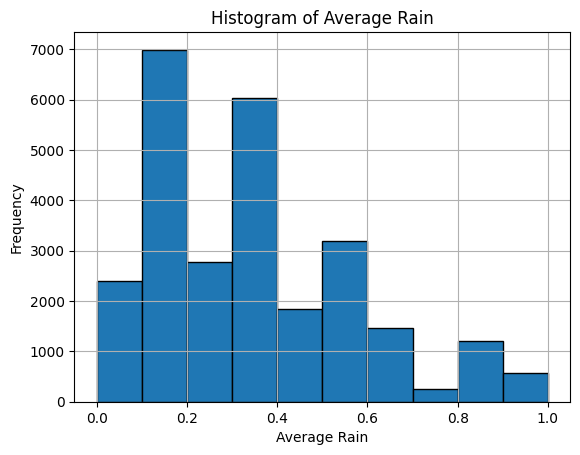

The Mean of the coloumn Average Rain: 0.33919212268921606
The Variance of the coloumn Average Rain: 0.050667436206125474


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Taking the coloumn average_rain from the dataframe data_final_noramlized
average_rain = yield_final_normalized['average_rain']

# Calculating the histogram for the coloumn average_rain
hist, bins = np.histogram(average_rain, bins=10)  

# Plot histogram with all the required attributes 
plt.hist(average_rain, bins=bins, edgecolor='black')
plt.title('Histogram of Average Rain')
plt.xlabel('Average Rain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculating the mean and the variance of the coloumn average_rain from the dataframe chosen
mean_rain = np.mean(average_rain)
variance_rain = np.var(average_rain)

print("The Mean of the coloumn Average Rain:", mean_rain)
print("The Variance of the coloumn Average Rain:", variance_rain)


**A3**

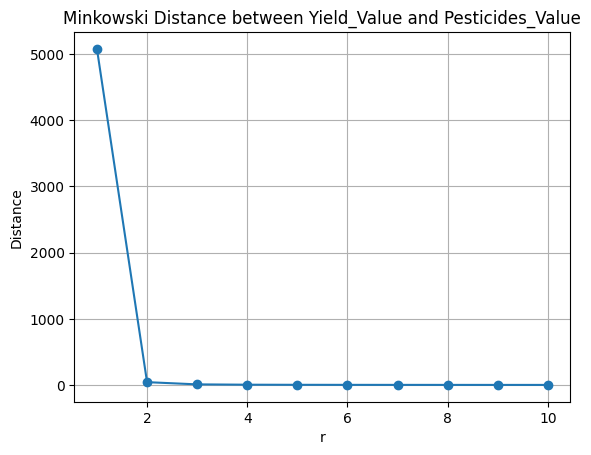

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Taking the coloumns Yield_Value and Pesticides_Value from the dataframe data_final_noramlized 
Yield_Value = yield_final_normalized['Yield_Value']
Pesticides_Value = yield_final_normalized['Pesticides_Value']

# Calculating the Minkowski distance for r from 1 to 10
r_values = range(1, 11)
distances = []

for r in r_values:
    minkowski_distance = np.linalg.norm(Yield_Value - Pesticides_Value, ord=r)
    distances.append(minkowski_distance)

# Plotting the given distances with the mentioned attributes
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Yield_Value and Pesticides_Value')
plt.xlabel('r')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


**A4**

In [24]:
from sklearn.model_selection import train_test_split

# Extractign the features such as Yield_Value and Pesticide Value from the dataframe and targeting the class Area_Albania
X = yield_final_normalized[['Yield_Value', 'Pesticides_Value']]  # Features
y = yield_final_normalized['Area_Albania']  # Using 'Area_Albania' as the target class

# Split the data into training and testing sets with a 60-40 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)  # You can adjust the test_size parameter as needed

# Finding the shapes of the testing and training data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (16051, 2)
Shape of X_test: (10702, 2)
Shape of y_train: (16051,)
Shape of y_test: (10702,)


**A5**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# loading the X_train and Y_ train i.e., features and the target variables for training knn classifier
neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

**A6**

In [26]:
# Loading the features and target variables (X_train and Y_train)
# Calculating the accuracy of the kNN classifier on the test set
accuracy = neigh.score(X_test, y_test)
print("Accuracy of kNN classifier on the test set:", accuracy)


Accuracy of kNN classifier on the test set: 0.9968230237338815


**A7**

In [28]:
# Assuming test_vect is any feature vector from your test set
avg_temp= X_test.iloc[0] 
predicted_class = neigh.predict([avg_temp])
print("The Predicted class for the test vector:", predicted_class)


The Predicted class for the test vector: [False]


C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**A8**

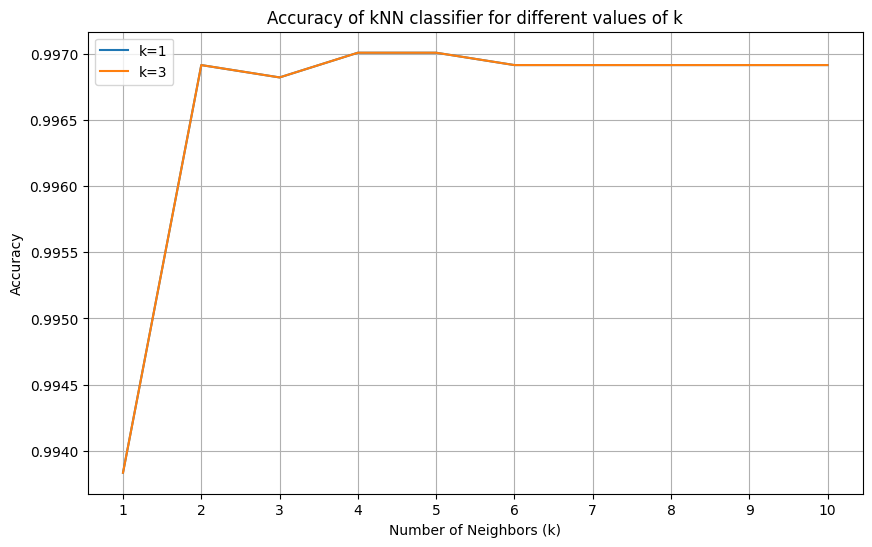

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Extract features and target variable
X = yield_final_normalized[['Yield_Value', 'Pesticides_Value']]
y = yield_final_normalized['Area_Albania']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Defining the range of k values
k_values = range(1, 11) 

# Initializing the lists to store accuracy for k=1 and k=3
accuracy_k1 = []
accuracy_k3 = []

# Iterating over each value of k
for k in k_values:
    # Initialize and train kNN classifier with k=1
    neigh_k1 = KNeighborsClassifier(n_neighbors=k)
    neigh_k1.fit(X_train, y_train)
    accuracy_k1.append(neigh_k1.score(X_test, y_test))

    # Initialize and train kNN classifier with k=3
    neigh_k3 = KNeighborsClassifier(n_neighbors=k)
    neigh_k3.fit(X_train, y_train)
    accuracy_k3.append(neigh_k3.score(X_test, y_test))

# Plotting the accuracies for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_k1, label='k=1')
plt.plot(k_values, accuracy_k3, label='k=3')
plt.title('Accuracy of kNN classifier for different values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


**A9**

In [30]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Define function to evaluate model performance and print metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Make predictions on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    train_confusion = confusion_matrix(y_train, y_train_pred)
    test_confusion = confusion_matrix(y_test, y_test_pred)
    
    # Calculate precision, recall, and F1-score
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Print confusion matrices and performance metrics
    print("Confusion Matrix for Training Data:")
    print(train_confusion)
    print("\nConfusion Matrix for Test Data:")
    print(test_confusion)
    print("\nPrecision (Training):", train_precision)
    print("Precision (Test):", test_precision)
    print("\nRecall (Training):", train_recall)
    print("Recall (Test):", test_recall)
    print("\nF1-Score (Training):", train_f1)
    print("\nF1-Score (Test):", test_f1)

# Initialize and train kNN classifier with k=1 and k=3
neigh_k1 = KNeighborsClassifier(n_neighbors=1)
neigh_k1.fit(X_train, y_train)

neigh_k3 = KNeighborsClassifier(n_neighbors=3)
neigh_k3.fit(X_train, y_train)

# Evaluate models
print("Evaluation for k=1:")
evaluate_model(neigh_k1, X_train, y_train, X_test, y_test)
print("\n---------------------------------\n")
print("Evaluation for k=3:")
evaluate_model(neigh_k3, X_train, y_train, X_test, y_test)


Evaluation for k=1:
Confusion Matrix for Training Data:
[[15985     0]
 [    0    66]]

Confusion Matrix for Test Data:
[[10636    33]
 [   33     0]]

Precision (Training): 1.0
Precision (Test): 0.0

Recall (Training): 1.0
Recall (Test): 0.0

F1-Score (Training): 1.0

F1-Score (Test): 0.0

---------------------------------

Evaluation for k=3:
Confusion Matrix for Training Data:
[[15982     3]
 [   59     7]]

Confusion Matrix for Test Data:
[[10667     2]
 [   32     1]]

Precision (Training): 0.7
Precision (Test): 0.3333333333333333

Recall (Training): 0.10606060606060606
Recall (Test): 0.030303030303030304

F1-Score (Training): 0.18421052631578946

F1-Score (Test): 0.05555555555555555
